Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [44]:
import pandas as pd
import numpy as np
from helper_functions import read_data, format_variables
import os
from graph_functions import *

Global Variables and Constants

In [45]:
MAIN_PLOT_DIR_NAME = "Descriptive_analysis_plots"
BOX_PLOT_DIR_NAME = "Box-plots"
BAR_PLOT_DIR_NAME = "Bar-plots"
MOSAIC_PLOT_DIR_NAME = "Mosaic-plots"
HIST_DIR_NAME = "Histograms"
MISC_PLOT_DIR_NAME = "Miscellaneous"
boxplot_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, BOX_PLOT_DIR_NAME)
barplot_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, BAR_PLOT_DIR_NAME)
mosaic_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, MOSAIC_PLOT_DIR_NAME)
misc_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, MISC_PLOT_DIR_NAME)
hist_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, HIST_DIR_NAME)

Creating Necessary directories for plots

In [46]:
if not os.path.isdir(MAIN_PLOT_DIR_NAME):
    os.mkdir(MAIN_PLOT_DIR_NAME)
if not os.path.isdir(boxplot_dir_path):
    os.mkdir(boxplot_dir_path)
if not os.path.isdir(barplot_dir_path):
    os.mkdir(barplot_dir_path)
if not os.path.isdir(mosaic_dir_path):
    os.mkdir(mosaic_dir_path)
if not os.path.isdir(misc_dir_path):
    os.mkdir(misc_dir_path)
if not os.path.isdir(hist_dir_path):
    os.mkdir(hist_dir_path)

Importing Data

In [47]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reformating Columns to Correct Data Types

In [48]:
data_df, cat_feats, num_feats = format_variables(data=data_df, to_filter=[], drop_values=False)

In [49]:
data_df.head()

,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,...,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,month,hour,day,age
0,26557,2006-08-30 10:33:29,1,8010.0,Graz - Jakomini,Graz(Stadt),Steiermark,2,1974,f,...,False,False,110.0,90.0,122.0,68.0,8,10,30,32.0
1,30797,2006-10-04 15:16:30,3,8113.0,Sankt Bartholomä,Graz-Umgebung,Steiermark,2,1938,m,...,False,False,140.0,80.0,134.0,81.0,10,15,4,68.0
2,30134,2006-09-28 10:49:24,2,8573.0,Kohlschwarz,Voitsberg,Steiermark,2,1978,f,...,True,False,120.0,70.0,104.0,68.0,9,10,28,28.0
3,30014,2006-09-26 13:19:04,1,8570.0,Voitsberg,Voitsberg,Steiermark,3,1989,m,...,False,False,140.0,80.0,167.0,88.0,9,13,26,17.0
4,19766,2006-07-08 17:00:32,3,8580.0,Köflach,Voitsberg,Steiermark,1,1955,m,...,False,False,125.0,85.0,128.0,92.0,7,17,8,51.0


In [50]:
print("Number of datapoints: ", len(data_df))
print("Number of variables: ", len(data_df.columns))
data_df.columns

Number of datapoints:  16386
Number of variables:  22


Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia', 'month', 'hour', 'day', 'age'],
      dtype='object')

Missing Values

In [51]:
data_df.isna().sum()

id                      0
zeit                    0
terminal                0
postleitzahl            0
gemeinde                0
bezirk                  0
bundesland              0
befinden                0
geburtsjahr            23
geschlecht              0
raucher                 0
blutzucker_bekannt      0
cholesterin_bekannt     0
in_behandlung           0
schaetzwert_bp_sys     45
schaetzwert_by_dia     56
messwert_bp_sys         0
messwert_bp_dia         0
month                   0
hour                    0
day                     0
age                    23
dtype: int64

In [52]:
print("Number of foreigners: ", len(data_df[data_df.postleitzahl == "not_applicable"]))
print("Number of locals: ", len(data_df[data_df.postleitzahl != "not_applicable"]))

Number of foreigners:  331
Number of locals:  16055


Statistics

In [53]:
summary = round(data_df[num_feats].describe(), 2)
summary

,id,zeit,terminal,geburtsjahr,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,month,hour,day,age
count,16386.00,16386,16386.00,16363.0,16341.00,16330.00,16386.00,16386.00,16386.00,16386.00,16386.00,16363.00
mean,23172.17,2006-08-03 19:02:11.527462144,1.92,1963.87,122.41,79.86,124.10,82.04,7.59,13.39,15.69,42.13
min,11519.00,2006-04-27 10:49:12,1.00,1880.0,34.00,30.00,43.00,27.00,4.00,8.00,1.00,0.00
25%,17978.25,2006-06-17 12:27:35.250000,1.00,1950.0,115.00,75.00,110.00,73.00,6.00,11.00,8.00,27.00
50%,23345.50,2006-08-08 14:29:51.500000,2.00,1962.0,120.00,80.00,123.00,81.00,8.00,13.00,16.00,44.00
75%,28781.75,2006-09-16 14:22:10.249999872,3.00,1979.0,130.00,85.00,137.00,90.00,9.00,15.00,24.00,56.00
max,34703.00,2006-11-06 09:55:33,3.00,2006.0,299.00,212.00,217.00,197.00,11.00,23.00,31.00,126.00
std,6556.96,NaN,0.82,18.53,16.94,9.96,19.68,14.64,1.72,2.24,8.92,18.53


Histograms

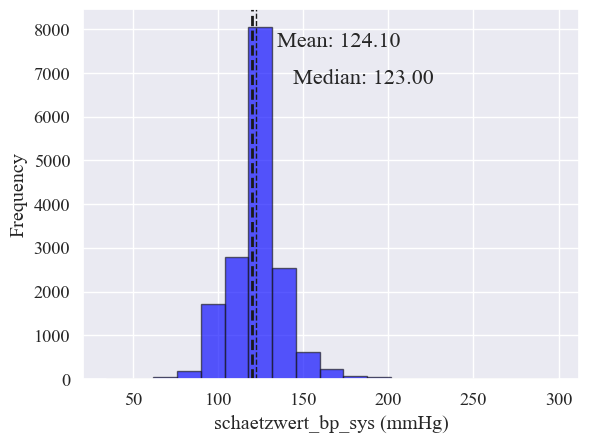

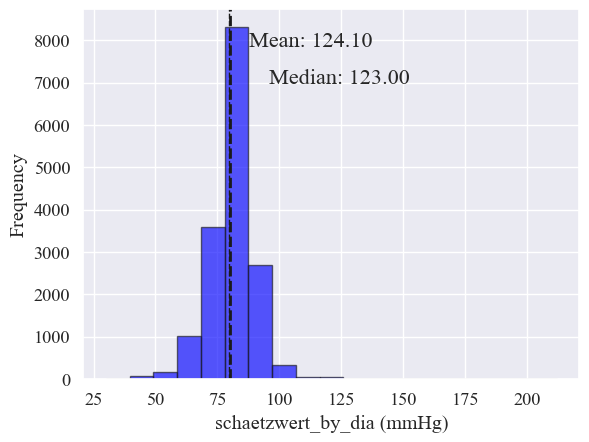

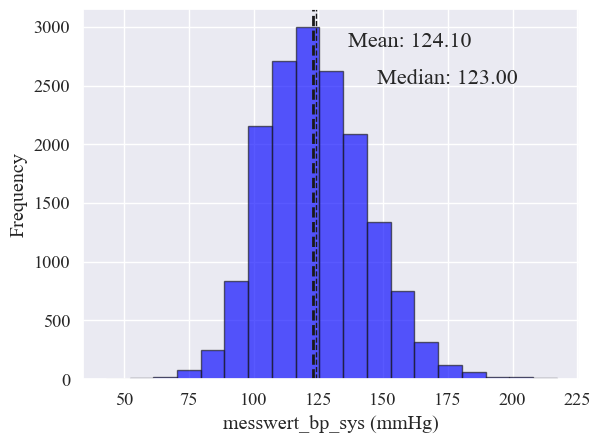

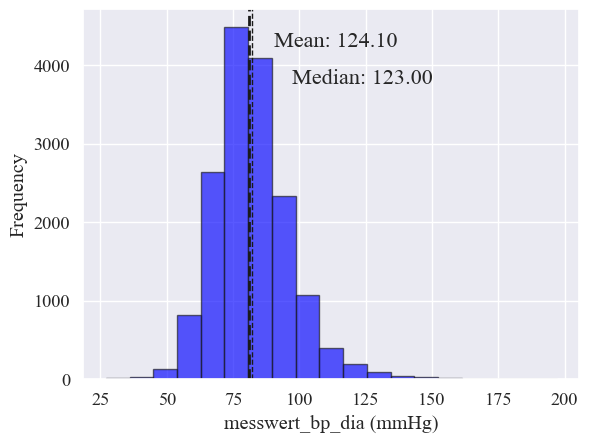

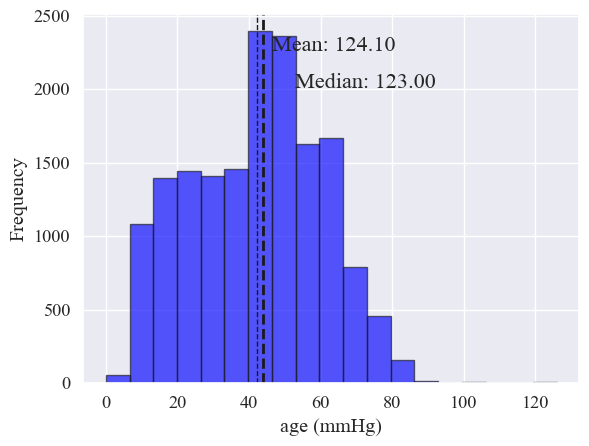

In [54]:
feats = [
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia',
 'age']
for feat in feats:
    create_histogram(data_df, feat, hist_dir_path)

Bar plots

In [55]:
cat_feats

['postleitzahl',
 'gemeinde',
 'bezirk',
 'bundesland',
 'befinden',
 'geschlecht',
 'raucher',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung']

bundesland
Steiermark          14373
Wien                  501
Niederösterreich      469
not_applicable        331
Oberösterreich        224
Kärnten               188
Burgenland            122
Salzburg               82
Tirol                  68
Vorarlberg             28
Name: count, dtype: int64


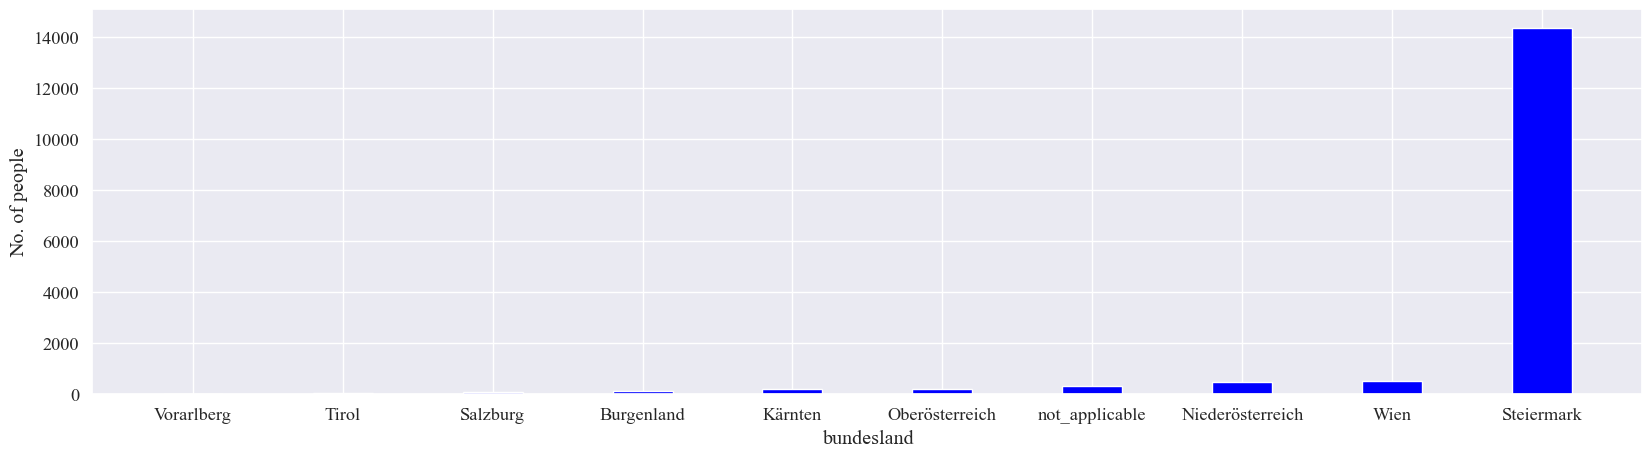

befinden
2          7931
1          5897
3          2240
4           198
5            97
unknown      23
Name: count, dtype: int64


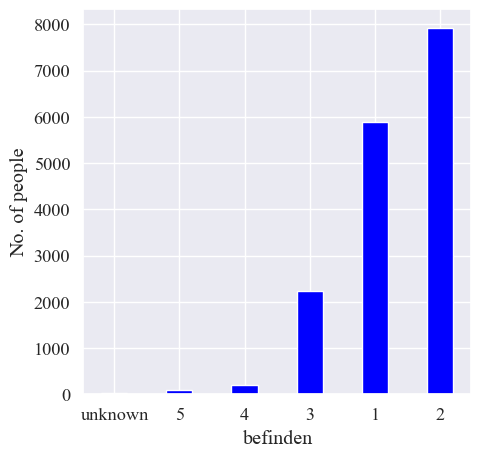

geschlecht
f          9190
m          7173
unknown      23
Name: count, dtype: int64


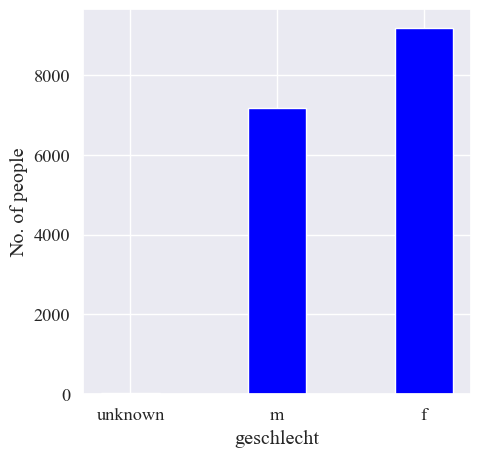

blutzucker_bekannt
False      12276
True        4087
unknown       23
Name: count, dtype: int64


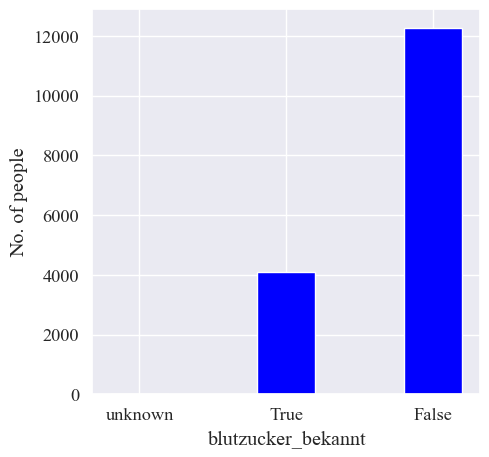

cholesterin_bekannt
False      10636
True        5727
unknown       23
Name: count, dtype: int64


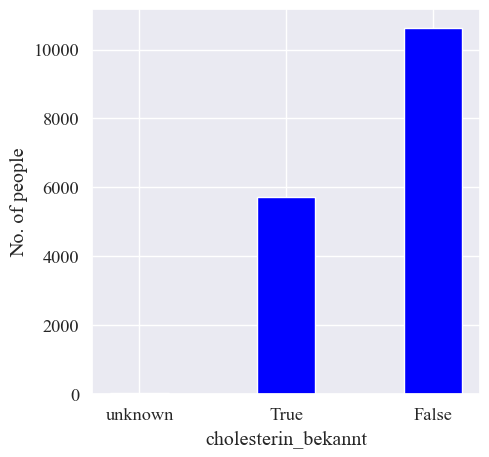

in_behandlung
False      14321
True        2042
unknown       23
Name: count, dtype: int64


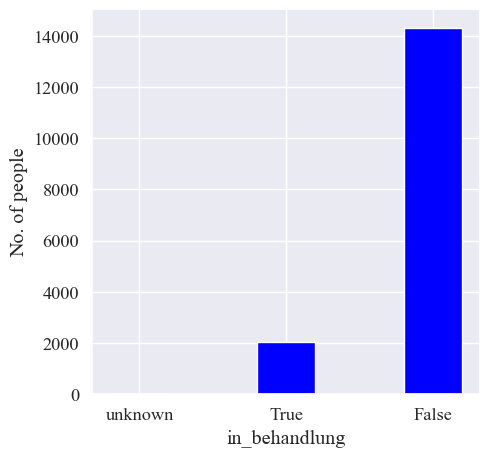

raucher
False      13888
True        2475
unknown       23
Name: count, dtype: int64


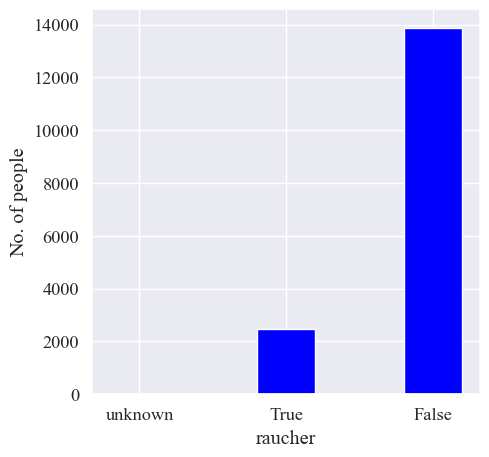

In [56]:
feats = [
 'bundesland',
 'befinden',
 'geschlecht',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung',
  'raucher',]

for feat in feats:
    create_bar_plot(data_df, feat, barplot_dir_path)

Correlation

In [57]:
num_feats

['id',
 'zeit',
 'terminal',
 'geburtsjahr',
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia',
 'month',
 'hour',
 'day',
 'age']

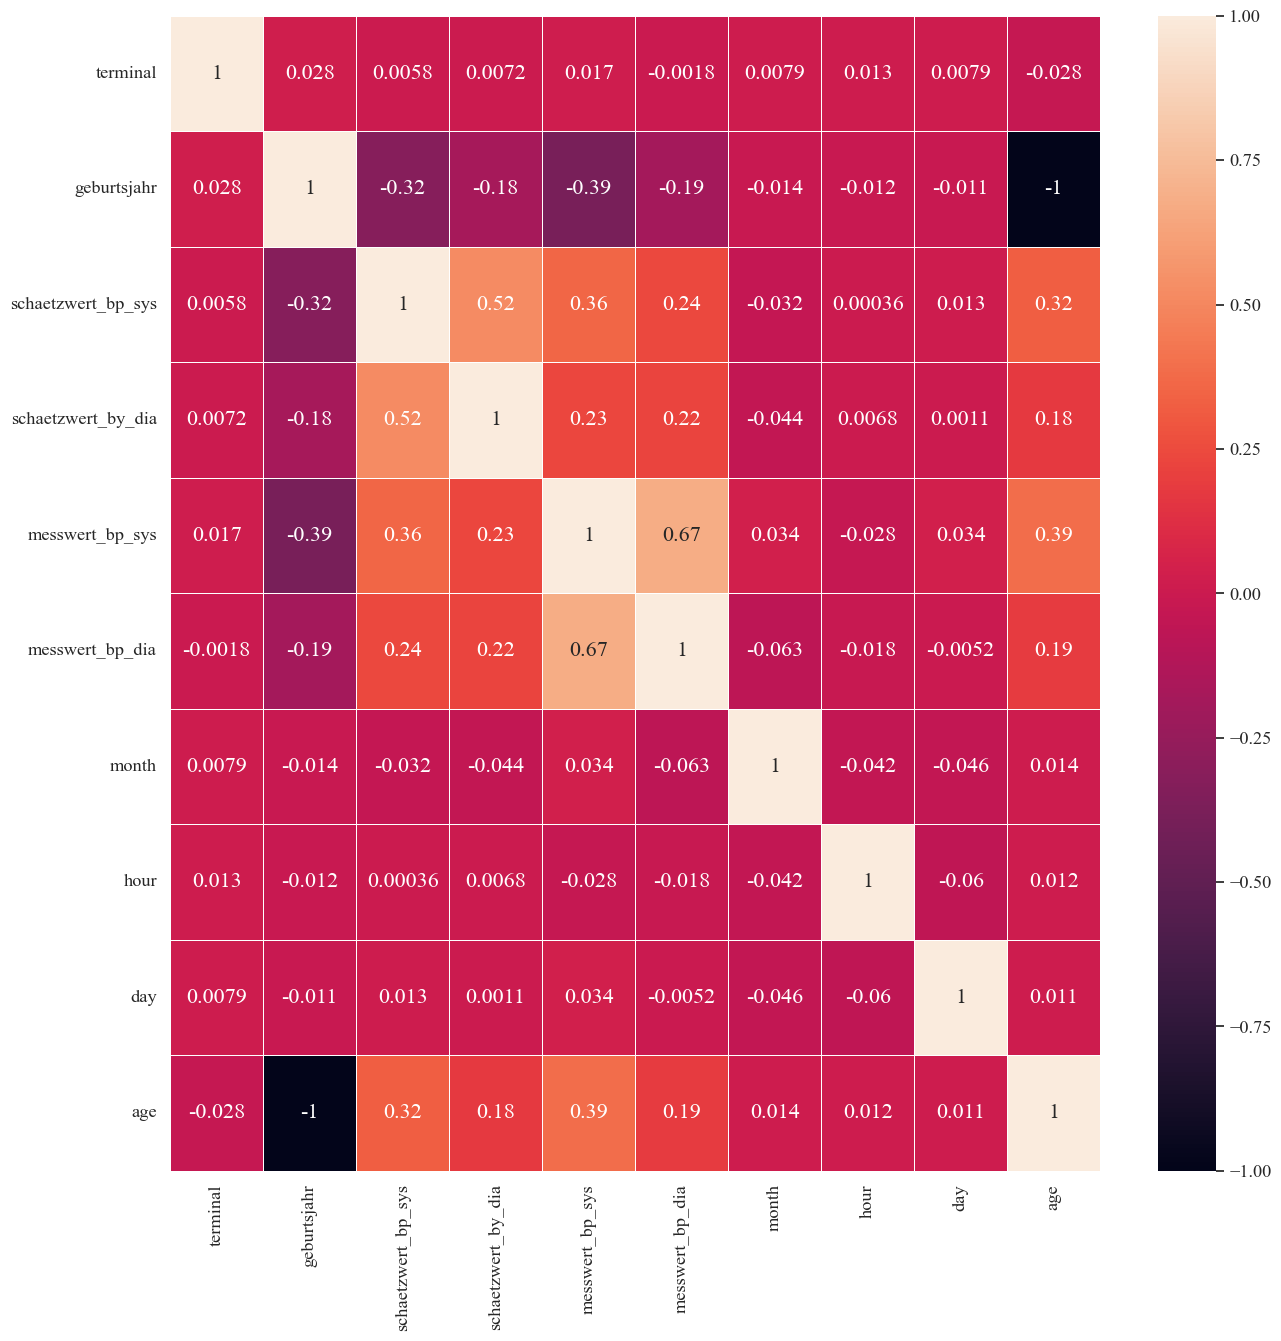

In [58]:
feats = [
 'terminal',
 'geburtsjahr',
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia',
 'month',
 'hour',
 'day',
 'age']
create_heat_map(data_df, feats, misc_dir_path)

Scatter Plots

<Figure size 640x480 with 0 Axes>

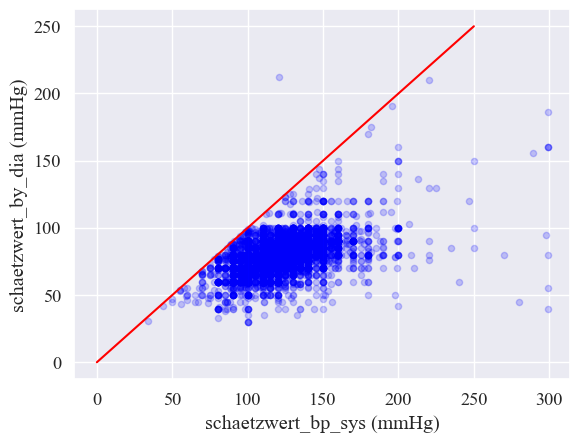

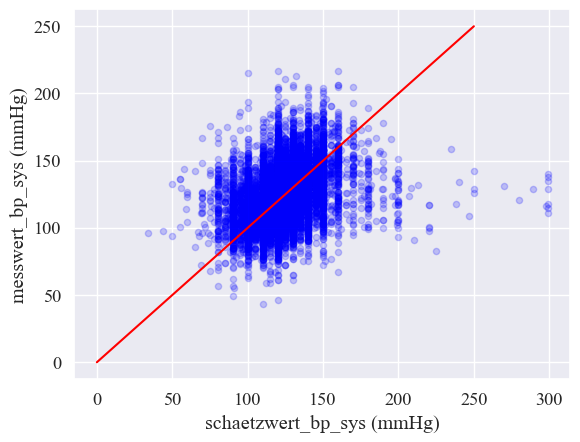

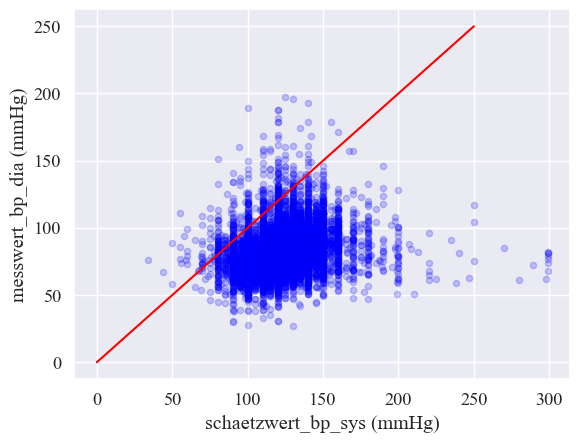

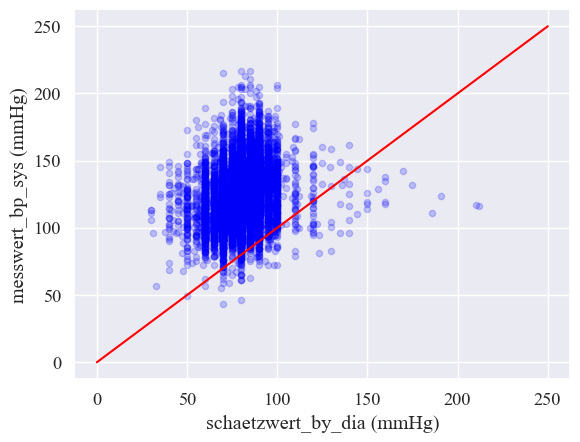

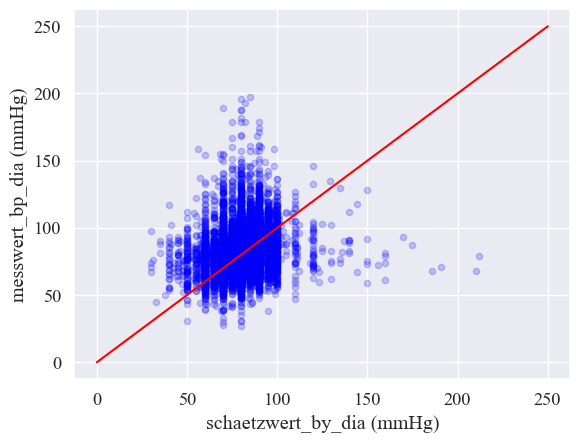

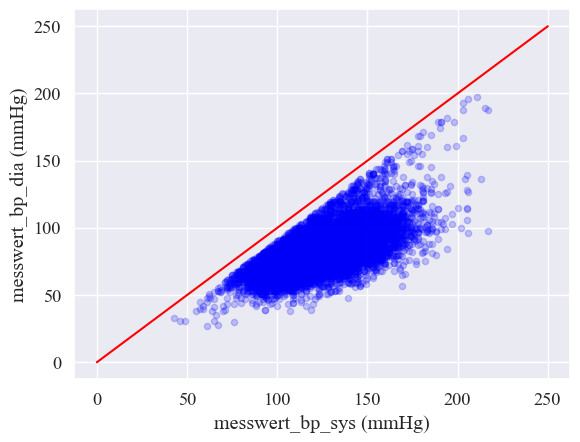

In [59]:
x = np.linspace(0, 250, 100)
feats = [
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia'
]
create_scatter_plot(data_df, feats, x, misc_dir_path)

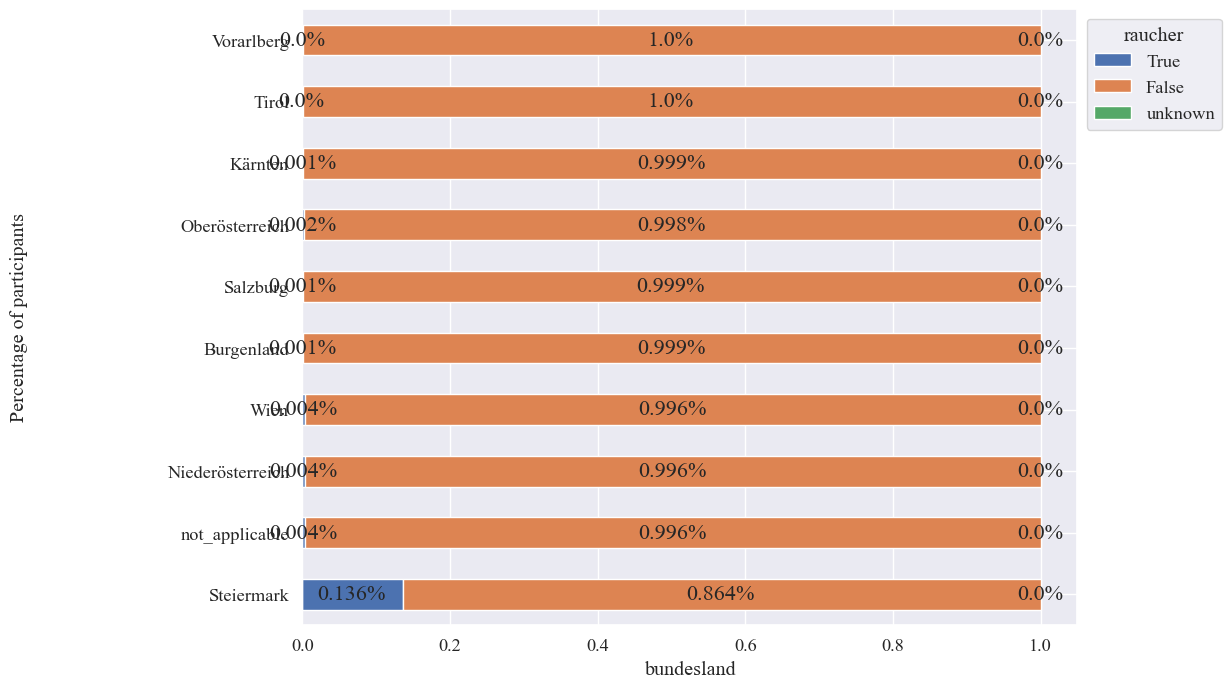

In [80]:
def create_stacked_barplot(data_df, main_col, group_col):
    main_col_cats = data_df[main_col].unique()
    group_col_cats = data_df[group_col].unique()
    df_rows = []

    for main_col_cat in main_col_cats:
        row = [main_col_cat]
        counts = []

        _sum = 0
        for group_col_cat in group_col_cats:
            count = len(data_df[(data_df[main_col] == main_col_cat) & data_df[group_col] == group_col_cat])
            counts.append(count)
            _sum += count
        
        counts = [float(count/_sum) for count in counts]
        df_rows.append(row + counts)

    df = pd.DataFrame(df_rows, columns=[main_col] + list(group_col_cats))
    ax = df.plot(
    x = main_col, 
    kind = 'barh', 
    stacked = True,  
    xlabel=main_col,
    mark_right = True,
    figsize=(10, 8),
    ylabel="Percentage of participants"
    )
    ax.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
    title=group_col,
    )
    df2 = df.copy()
    del df2[main_col]
    for n in df2:
        for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                            df[n], df[n])):
            plt.text((cs - ab / 2) - 0.001, i, str(np.round(pc, 3)) + '%', 
                    va = 'center', ha = 'center', rotation = 0, fontsize = 16)

create_stacked_barplot(data_df, "bundesland", "raucher")